In [ ]:
import pandas as pd
import numpy as np
import nltk

from nltk.corpus.reader.propbank import PropbankTreePointer, PropbankSplitTreePointer


In [2]:
roles_pb = pd.read_csv("../../decomp/protoroles_eng_pb_08302015.tsv", delim_whitespace="\t")
roles_pb


/var/folders/lq/kd3wh6952vg99n5ppf4srz9w0000gn/T/ipykernel_87564/56665985.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  roles_pb = pd.read_csv("../../decomp/protoroles_eng_pb_08302015.tsv", delim_whitespace="\t")


,Split,Sentence.ID,Pred.Token,Arg,Arg.Pos,Roleset,Gram.Func,Property,Response,Applicable
0,train,1778_51,1,0,0:1,hear.01,subj,awareness,5,True
1,train,1412_1,1,0,0:1,chastise.01,subj,awareness,5,True
2,train,2232_43,1,0,0:1,put.03,subj,awareness,5,True
3,train,2439_6,11,0,0:2,receive.01,subj,awareness,5,True
4,train,0406_12,2,0,0:1,prompt.01,subj,awareness,1,False
...,...,...,...,...,...,...,...,...,...,...
175279,train,1203_43,5,5,6:1,inch.01,other,destroyed,1,False
175280,test,1540_6,2,5,3:1,edge.01,other,destroyed,1,False
175281,train,0675_7,4,5,5:0,edge.01,other,destroyed,1,False
175282,dev,1765_19,14,5,15:0,edge.01,other,destroyed,1,False


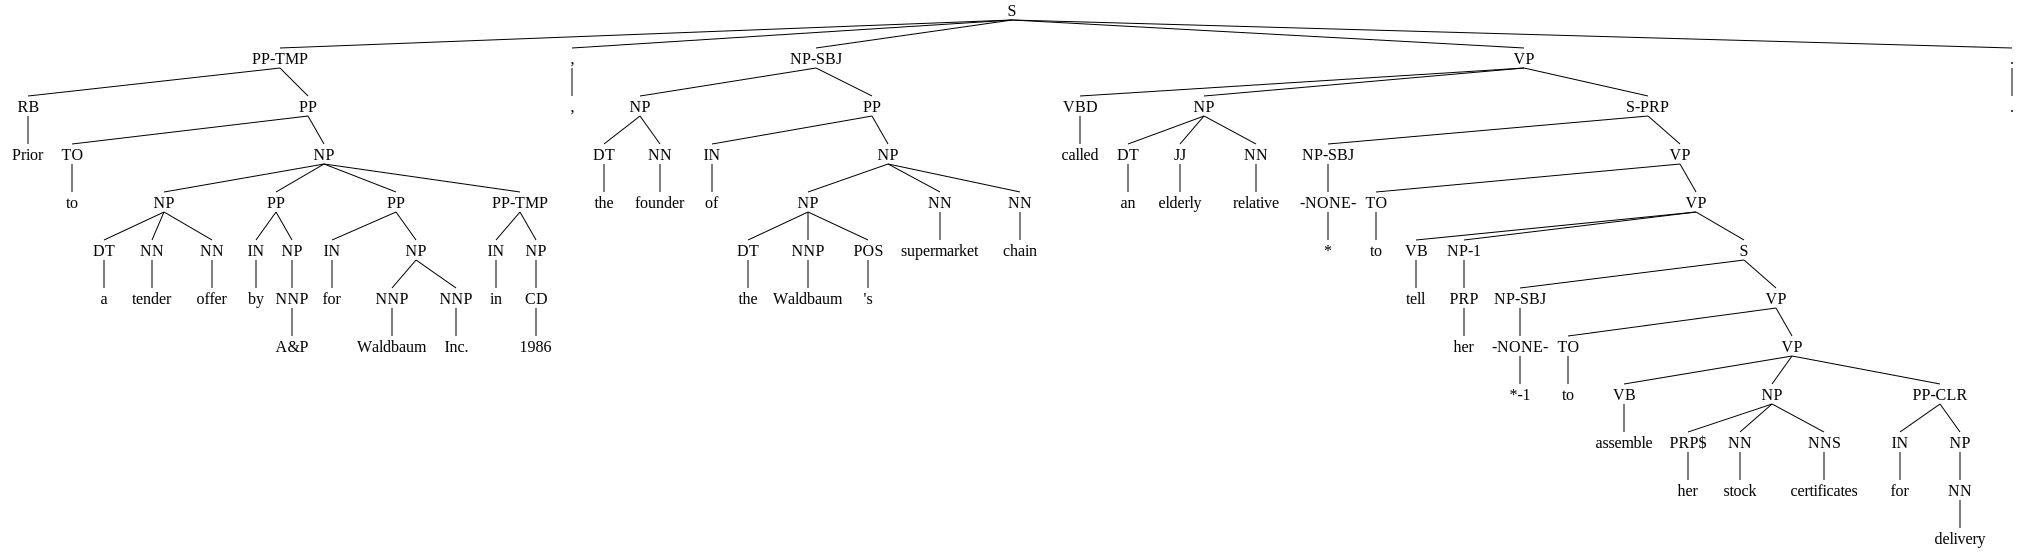

In [ ]:
path = "/Users/lli/Desktop/code/datasets/penn_treebank/package/treebank_3/parsed/mrg/wsj/"

def get_sentence_parse(id):
    try:
        file_id, sent_id = id.split("_")
        file_path = path + f"{file_id[:2]}/wsj_{file_id}.mrg"
        with open(file_path, mode="r") as f:
            lines = list(map(
                lambda x: "_START_" + x.strip() + " " if x[:3] == "( (" or x[:2] == "((" else x.strip() + " ",
                f.readlines()
                ))
        lines = "".join(lines).split("_START_")
        lines = list(map(
            lambda x: x[1:-2],
            filter(lambda x: x.strip() != "", lines))
            )
        parsed = lines[int(sent_id)]
        tree = nltk.tree.ParentedTree.fromstring(parsed)
        return tree
    except:
        print(id)
        return None

tree = get_sentence_parse("2059_10")
tree


In [5]:
roles_wide = roles_pb.pivot_table(index=["Sentence.ID",  "Roleset", "Pred.Token", "Arg", "Arg.Pos", "Gram.Func", "Split"], columns="Property", values="Response")
roles_wide.reset_index(inplace=True)

roles_wide


Property,Sentence.ID,Roleset,Pred.Token,Arg,Arg.Pos,Gram.Func,Split,awareness,change_of_location,change_of_state,...,existed_during,exists_as_physical,instigation,location_of_event,makes_physical_contact,manipulated_by_another,predicate_changed_argument,sentient,stationary,volition
0,0003_21,impose.01,7,0,3:1,subj,train,5.0,1.0,3.0,...,5.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0
1,0003_21,impose.01,7,1,8:1,obj,test,1.0,1.0,3.0,...,5.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0
2,0003_21,impose.01,7,2,11:1,other,train,1.0,1.0,4.0,...,5.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0
3,0003_25,dump.01,1,0,0:1,subj,train,5.0,3.0,3.0,...,5.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,3.0,5.0
4,0003_25,dump.01,1,1,2:2,obj,train,1.0,5.0,5.0,...,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,2454_31,consider.01,2,1,3:1,other,train,5.0,3.0,3.0,...,5.0,5.0,5.0,1.0,3.0,1.0,3.0,5.0,3.0,5.0
9734,2454_31,consider.01,2,2,4:1,other,train,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0
9735,2454_7,shoot.06,16,0,13:1,subj,train,5.0,3.0,3.0,...,5.0,5.0,5.0,1.0,3.0,1.0,2.0,5.0,3.0,5.0
9736,2454_7,shoot.06,16,1,17:1,obj,train,1.0,5.0,5.0,...,5.0,5.0,1.0,1.0,2.0,5.0,5.0,1.0,1.0,1.0


In [6]:
roles_wide["tree"] = roles_wide["Sentence.ID"].apply(get_sentence_parse)

roles_wide


Property,Sentence.ID,Roleset,Pred.Token,Arg,Arg.Pos,Gram.Func,Split,awareness,change_of_location,change_of_state,...,exists_as_physical,instigation,location_of_event,makes_physical_contact,manipulated_by_another,predicate_changed_argument,sentient,stationary,volition,tree
0,0003_21,impose.01,7,0,3:1,subj,train,5.0,1.0,3.0,...,1.0,5.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0,"[[[In], [(NNP July)]], [,], [[the], [Environme..."
1,0003_21,impose.01,7,1,8:1,obj,test,1.0,1.0,3.0,...,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,"[[[In], [(NNP July)]], [,], [[the], [Environme..."
2,0003_21,impose.01,7,2,11:1,other,train,1.0,1.0,4.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,"[[[In], [(NNP July)]], [,], [[the], [Environme..."
3,0003_25,dump.01,1,0,0:1,subj,train,5.0,3.0,3.0,...,5.0,5.0,1.0,5.0,1.0,1.0,5.0,3.0,5.0,"[[[Workers]], [[(VBD dumped), (NP\n (NP (JJ l..."
4,0003_25,dump.01,1,1,2:2,obj,train,1.0,5.0,5.0,...,5.0,1.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0,"[[[Workers]], [[(VBD dumped), (NP\n (NP (JJ l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,2454_31,consider.01,2,1,3:1,other,train,5.0,3.0,3.0,...,5.0,5.0,1.0,3.0,1.0,3.0,5.0,3.0,5.0,"[[[They]], [[never]], [[considered], [(NP-SBJ ..."
9734,2454_31,consider.01,2,2,4:1,other,train,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,"[[[They]], [[never]], [[considered], [(NP-SBJ ..."
9735,2454_7,shoot.06,16,0,13:1,subj,train,5.0,3.0,3.0,...,5.0,5.0,1.0,3.0,1.0,2.0,5.0,3.0,5.0,"[[[As], [(NP-SBJ\n (NP (DT the) (NN crowd))\n..."
9736,2454_7,shoot.06,16,1,17:1,obj,train,1.0,5.0,5.0,...,5.0,1.0,1.0,2.0,5.0,5.0,1.0,1.0,1.0,"[[[As], [(NP-SBJ\n (NP (DT the) (NN crowd))\n..."


In [7]:
def get_arg(row):
    tree = row["tree"]
    position = row["Arg.Pos"]
    try:
        pointer = PropbankTreePointer(*map(int, position.split(":")))
    except:
        pieces = [PropbankTreePointer(*map(int, x.split(":"))) for x in position.split(",")]
        pointer = PropbankSplitTreePointer(pieces)
    subtree = pointer.select(tree)
    return subtree

def get_string(tree):
    if tree is None:
        raise Exception
        return ""
    return " ".join(tree.leaves())


In [8]:
roles_wide["Arg.Phrase"] = roles_wide.apply(get_arg, axis=1)

roles_wide


Property,Sentence.ID,Roleset,Pred.Token,Arg,Arg.Pos,Gram.Func,Split,awareness,change_of_location,change_of_state,...,instigation,location_of_event,makes_physical_contact,manipulated_by_another,predicate_changed_argument,sentient,stationary,volition,tree,Arg.Phrase
0,0003_21,impose.01,7,0,3:1,subj,train,5.0,1.0,3.0,...,5.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0,"[[[In], [(NNP July)]], [,], [[the], [Environme...","[[the], [Environmental], [Protection], [Agency]]"
1,0003_21,impose.01,7,1,8:1,obj,test,1.0,1.0,3.0,...,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,"[[[In], [(NNP July)]], [,], [[the], [Environme...","[[a], [gradual], [ban]]"
2,0003_21,impose.01,7,2,11:1,other,train,1.0,1.0,4.0,...,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,"[[[In], [(NNP July)]], [,], [[the], [Environme...","[[on], [[(ADJP (RB virtually) (DT all)), (NNS ..."
3,0003_25,dump.01,1,0,0:1,subj,train,5.0,3.0,3.0,...,5.0,1.0,5.0,1.0,1.0,5.0,3.0,5.0,"[[[Workers]], [[(VBD dumped), (NP\n (NP (JJ l...",[[Workers]]
4,0003_25,dump.01,1,1,2:2,obj,train,1.0,5.0,5.0,...,1.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0,"[[[Workers]], [[(VBD dumped), (NP\n (NP (JJ l...","[[[large], [burlap], [sacks]], [[of], [(DT the..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,2454_31,consider.01,2,1,3:1,other,train,5.0,3.0,3.0,...,5.0,1.0,3.0,1.0,3.0,5.0,3.0,5.0,"[[[They]], [[never]], [[considered], [(NP-SBJ ...",[[themselves]]
9734,2454_31,consider.01,2,2,4:1,other,train,1.0,1.0,1.0,...,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,"[[[They]], [[never]], [[considered], [(NP-SBJ ...","[[to], [[be], [(NN anything), (RB else)]]]"
9735,2454_7,shoot.06,16,0,13:1,subj,train,5.0,3.0,3.0,...,5.0,1.0,3.0,1.0,2.0,5.0,3.0,5.0,"[[[As], [(NP-SBJ\n (NP (DT the) (NN crowd))\n...","[[the], [old], [man]]"
9736,2454_7,shoot.06,16,1,17:1,obj,train,1.0,5.0,5.0,...,1.0,1.0,2.0,5.0,5.0,1.0,1.0,1.0,"[[[As], [(NP-SBJ\n (NP (DT the) (NN crowd))\n...","[[his], [fists]]"


In [9]:
import spacy
import re

# use spacy parsing model
spacy_nlp = spacy.load('en_core_web_trf')

# use custom tokenizer that splits only at spaces
spacy_nlp.tokenizer = spacy.tokenizer.Tokenizer(
    spacy_nlp.vocab, token_match=re.compile(r'\S+').match)

class Node:
    def __init__(self, name):
        self.name = name
        self.left = []
        self.right = []

    def to_string(self):
        left_string, right_string = "", ""
        if self.left:
            left_string = " ".join(l.to_string() for l in self.left) + " "
        if self.right:
            right_string = " " + " ".join(r.to_string() for r in self.right)
        return left_string + self.name + right_string
    

def filter_children(root):
    children = []
    for child in root.lefts:
        children.append((child, "left"))
    
    for child in root.rights:
        children.append((child, "right"))

    new_arg = Node(root.text)

    for child, side in children:
        # print(child, child.dep_)

        # keep dets
        if child.dep_ == "det":
            if side == "left":
                new_arg.left.append(Node(child.text))
            else:
                new_arg.right.append(Node(child.text))
        elif child.dep_ == "poss":
            # change poss to det
            if side == "left":
                new_arg.left.append(Node("the"))
            else:
                new_arg.right.append(Node("the"))
        # keep compounds
        elif child.dep_ in ["cc", "compound", "conj", "nummod"]:
            if side == "left":
                node = filter_children(child)
                new_arg.left.append(node)
            else:
                node = filter_children(child)
                new_arg.right.append(node)
    
    return new_arg


def strip_np(subtree):
    if isinstance(subtree, str):
        doc = spacy_nlp(subtree)
    else:
        doc = spacy_nlp(" ".join(subtree.leaves()))
    root = doc[0].sent.root
    new_arg = filter_children(root)
    return new_arg.to_string()


/Users/lli/anaconda3/envs/metaphor/lib/python3.11/site-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(fi

In [10]:
strip_np("Indiana duckling mousseline , lobster consomme , veal mignon and chocolate terrine with a raspberry sauce")


/Users/lli/anaconda3/envs/metaphor/lib/python3.11/site-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


'Indiana duckling mousseline lobster consomme veal mignon and chocolate terrine'

In [11]:
def remove_modifiers(t):
    if t.height() <= 2: # leaf
        # return t
        return
    
    if t.label().split("-")[0] == "NP":
        new_arg = strip_np(t)
        t.clear()
        t.append(new_arg)
        return
    
    for child in t[::-1]:
        remove_modifiers(child)

    #remove remaining commas
    prev = None
    for child in t:
        if prev and prev.label() == "," and child.label() == ",":
            t.remove(prev)
            t.remove(child)
            prev = None
        else:
            prev = child

    # return t


In [12]:
def get_stripped(row, remove_all=False):
    if not remove_all:
        tree = row["tree"]
        position = row["Arg.Pos"]
        try:
            pointer = PropbankTreePointer(*map(int, position.split(":")))
        except:
            pieces = [PropbankTreePointer(*map(int, x.split(":"))) for x in position.split(",")]
            pointer = PropbankSplitTreePointer(pieces)
        
        new_tree = nltk.tree.ParentedTree.convert(tree.copy(deep=True))
        try:
            subtree = pointer.select(new_tree)
        except IndexError:
            new_tree.pretty_print()
            print(pointer)
            print(row)
        remove_modifiers(subtree)
        return subtree

    else:
        tree = row["tree"]
        positions = row["Arg.Positions"]
        new_tree = nltk.tree.ParentedTree.convert(tree.copy(deep=True))
        positions = ",".join(positions).split(",")
        tree_pointers = [PropbankTreePointer(*map(int, p.split(":"))).treepos(new_tree) for p in positions]

        for treepos in tree_pointers:            
            try:
                subtree = new_tree[treepos]
                # subtree = pointer.select(new_tree)
                remove_modifiers(subtree)
            except IndexError as e:
                if any(treepos[:-n] in tree_pointers for n in range(1, len(treepos))):
                    continue
                else:
                    print(treepos)
                    print(row)
                    raise e
        return new_tree
        


In [13]:
roles_wide["Arg.Stripped"] = roles_wide.apply(get_stripped, axis=1)
roles_wide


Property,Sentence.ID,Roleset,Pred.Token,Arg,Arg.Pos,Gram.Func,Split,awareness,change_of_location,change_of_state,...,location_of_event,makes_physical_contact,manipulated_by_another,predicate_changed_argument,sentient,stationary,volition,tree,Arg.Phrase,Arg.Stripped
0,0003_21,impose.01,7,0,3:1,subj,train,5.0,1.0,3.0,...,1.0,1.0,1.0,3.0,1.0,1.0,5.0,"[[[In], [(NNP July)]], [,], [[the], [Environme...","[[the], [Environmental], [Protection], [Agency]]",[the Environmental Protection Agency]
1,0003_21,impose.01,7,1,8:1,obj,test,1.0,1.0,3.0,...,1.0,1.0,5.0,5.0,1.0,1.0,1.0,"[[[In], [(NNP July)]], [,], [[the], [Environme...","[[a], [gradual], [ban]]",[a ban]
2,0003_21,impose.01,7,2,11:1,other,train,1.0,1.0,4.0,...,1.0,1.0,1.0,5.0,1.0,1.0,1.0,"[[[In], [(NNP July)]], [,], [[the], [Environme...","[[on], [[(ADJP (RB virtually) (DT all)), (NNS ...","[[on], [all uses]]"
3,0003_25,dump.01,1,0,0:1,subj,train,5.0,3.0,3.0,...,1.0,5.0,1.0,1.0,5.0,3.0,5.0,"[[[Workers]], [[(VBD dumped), (NP\n (NP (JJ l...",[[Workers]],[Workers]
4,0003_25,dump.01,1,1,2:2,obj,train,1.0,5.0,5.0,...,1.0,5.0,5.0,5.0,1.0,1.0,1.0,"[[[Workers]], [[(VBD dumped), (NP\n (NP (JJ l...","[[[large], [burlap], [sacks]], [[of], [(DT the...",[burlap sacks]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,2454_31,consider.01,2,1,3:1,other,train,5.0,3.0,3.0,...,1.0,3.0,1.0,3.0,5.0,3.0,5.0,"[[[They]], [[never]], [[considered], [(NP-SBJ ...",[[themselves]],[themselves]
9734,2454_31,consider.01,2,2,4:1,other,train,1.0,1.0,1.0,...,1.0,1.0,5.0,1.0,1.0,1.0,1.0,"[[[They]], [[never]], [[considered], [(NP-SBJ ...","[[to], [[be], [(NN anything), (RB else)]]]","[[to], [[be], [anything]]]"
9735,2454_7,shoot.06,16,0,13:1,subj,train,5.0,3.0,3.0,...,1.0,3.0,1.0,2.0,5.0,3.0,5.0,"[[[As], [(NP-SBJ\n (NP (DT the) (NN crowd))\n...","[[the], [old], [man]]",[the man]
9736,2454_7,shoot.06,16,1,17:1,obj,train,1.0,5.0,5.0,...,1.0,2.0,5.0,5.0,1.0,1.0,1.0,"[[[As], [(NP-SBJ\n (NP (DT the) (NN crowd))\n...","[[his], [fists]]",[the fists]


In [14]:
roles_adjectives = roles_wide.copy()
roles_adjectives["Arg.Phrase"] = roles_adjectives["Arg.Phrase"].apply(lambda x: x if any(adj in list(zip(*x.pos()))[1] for adj in ["JJ", "JJR", "JJS"]) else np.nan)
roles_adjectives.dropna(inplace=True)
roles_adjectives["Adjective"] = roles_adjectives["Arg.Phrase"].apply(lambda x: tuple(a[0] for a in x.pos() if a[1] in ["JJ", "JJR", "JJS"])).replace((), np.nan)

roles_adjectives["Sentence"] = roles_adjectives["tree"].apply(get_string)
roles_adjectives["Arg.Phrase"] = roles_adjectives["Arg.Phrase"].apply(get_string)
roles_adjectives["Arg.Stripped"] = roles_adjectives["Arg.Stripped"].apply(get_string)
roles_adjectives.drop(columns=["Roleset", "Pred.Token", "Arg.Pos", "Split", "tree"], inplace=True)

roles_adjectives.to_csv("sentences_adj_only.csv")
roles_adjectives


Property,Sentence.ID,Arg,Gram.Func,awareness,change_of_location,change_of_state,changes_possession,created,destroyed,existed_after,...,makes_physical_contact,manipulated_by_another,predicate_changed_argument,sentient,stationary,volition,Arg.Phrase,Arg.Stripped,Adjective,Sentence
1,0003_21,1,obj,1.0,1.0,3.0,1.0,5.0,1.0,5.0,...,1.0,5.0,5.0,1.0,1.0,1.0,a gradual ban,a ban,"(gradual,)","In July , the Environmental Protection Agency ..."
4,0003_25,1,obj,1.0,5.0,5.0,3.0,1.0,5.0,1.0,...,5.0,5.0,5.0,1.0,1.0,1.0,large burlap sacks of the imported material,burlap sacks,"(large,)",Workers dumped large burlap sacks of the impor...
6,0003_25,1,obj,1.0,5.0,5.0,1.0,1.0,1.0,5.0,...,5.0,5.0,5.0,1.0,1.0,1.0,the dry fibers,the fibers,"(dry,)",Workers dumped large burlap sacks of the impor...
11,0003_3,1,subj,1.0,1.0,3.0,1.0,2.0,1.0,5.0,...,1.0,5.0,1.0,1.0,1.0,1.0,the latest results,the results,"(latest,)",Although preliminary findings were reported *-...
13,0003_9,1,obj,5.0,3.0,3.0,1.0,1.0,1.0,3.0,...,3.0,5.0,3.0,1.0,1.0,5.0,a team of researchers from the National Cancer...,a team,"(medical,)",Dr. Talcott led a team of researchers from the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,2448_34,1,subj,1.0,1.0,5.0,1.0,5.0,1.0,5.0,...,1.0,5.0,5.0,1.0,1.0,1.0,Many of the toy makers ' problems,Many,"(Many, toy)",Many of the toy makers ' problems started well...
9710,2451_20,0,subj,1.0,1.0,1.0,1.0,1.0,1.0,5.0,...,1.0,5.0,1.0,1.0,1.0,1.0,Such proclamations,proclamations,"(Such,)",Such proclamations leave network officials all...
9716,2451_50,0,subj,5.0,3.0,3.0,1.0,1.0,1.0,5.0,...,3.0,1.0,2.0,5.0,3.0,5.0,"former President Ronald Reagan , a one-time ac...",President Ronald Reagan,"(former, one-time)",But just eight days before the rules were * to...
9722,2452_7,1,subj,1.0,1.0,3.0,1.0,1.0,1.0,5.0,...,1.0,1.0,5.0,1.0,1.0,1.0,A trial on criminal allegations against the co...,A trial,"(criminal, same, former)",A trial on criminal allegations against the co...


In [15]:
r = roles_wide[["Sentence.ID", "Arg.Pos", "tree", "Gram.Func", "Roleset"]]
r["tree"] = r["tree"].apply(lambda x: x.pformat() if x else "()")
r = r.pivot_table(index=["Sentence.ID", "tree", "Roleset"], values="Arg.Pos", columns="Gram.Func", aggfunc=list)
# r.drop(columns="other", inplace=True)
r.reset_index(inplace=True, col_level=0)
r.set_index(["Sentence.ID", "Roleset"], inplace=True)

r["tree"] = r["tree"].apply(nltk.tree.Tree.fromstring)
r["Arg.Positions"] = r["obj"].fillna("").apply(list) + r["other"].fillna("").apply(list) + r["subj"].fillna("").apply(list)
r["stripped_tree"] = r.apply(get_stripped, remove_all=True, axis=1)
r


/var/folders/lq/kd3wh6952vg99n5ppf4srz9w0000gn/T/ipykernel_87564/3664506024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r["tree"] = r["tree"].apply(lambda x: x.pformat() if x else "()")
/Users/lli/anaconda3/envs/metaphor/lib/python3.11/site-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


Gram.Func                                                             tree  \
Sentence.ID Roleset                                                          
0003_21     impose.01    [[[In], [(NNP July)]], [,], [[the], [Environme...   
0003_25     dump.01      [[[Workers]], [[(VBD dumped), (NP\n  (NP (JJ l...   
            mix.01       [[[Workers]], [[(VBD dumped), (NP\n  (NP (JJ l...   
            pour.01      [[[Workers]], [[(VBD dumped), (NP\n  (NP (JJ l...   
0003_29     have.03      [[[It]], [[has], [(NP (DT no) (NN bearing)), (...   
...                                                                    ...   
2453_6      succumb.01   [[But], [[Intel]], [[later]], [[succumbed], [(...   
2454_15     shake.01     [[[(VBG Deafening), (NNS chants)], [(IN of), (...   
2454_18     release.01   [[[President], [F.W.], [de], [Klerk]], [[relea...   
2454_31     consider.01  [[[They]], [[never]], [[considered], [(NP-SBJ ...   
2454_7      shoot.06     [[[As], [(NP-SBJ\n  (NP (DT the) (NN crowd))\n...   

Gram.Func                   obj       other    subj       Arg.Positions  \
Sentence.ID Roleset                                                       
0003_21     impose.01     [8:1]      [11:1]   [3:1]    [8:1, 11:1, 3:1]   
0003_25     dump.01       [2:2]         NaN   [0:1]          [2:2, 0:1]   
            mix.01       [23:1]         NaN   [0:1]         [23:1, 0:1]   
            pour.01      [16:1]         NaN   [0:1]         [16:1, 0:1]   
0003_29     have.03       [2:2]         NaN   [0:1]          [2:2, 0:1]   
...                         ...         ...     ...                 ...   
2453_6      succumb.01      NaN       [4:1]   [1:1]          [4:1, 1:1]   
2454_15     shake.01     [13:1]         NaN   [0:2]         [13:1, 0:2]   
2454_18     release.01    [5:1]         NaN   [0:1]          [5:1, 0:1]   
2454_31     consider.01     NaN  [3:1, 4:1]     NaN          [3:1, 4:1]   
2454_7      shoot.06     [17:1]      [19:1]  [13:1]  [17:1, 19:1, 13:1]   

Gram.Func                                                    stripped_tree  
Sentence.ID Roleset                                                         
0003_21     impose.01    [[[In], [(NNP July)]], [,], [the Environmental...  
0003_25     dump.01      [[Workers], [[(VBD dumped), (NP burlap sacks),...  
            mix.01       [[Workers], [[(VBD dumped), (NP\n  (NP (JJ lar...  
            pour.01      [[Workers], [[(VBD dumped), (NP\n  (NP (JJ lar...  
0003_29     have.03                     [[It], [[has], [no bearing]], [.]]  
...                                                                    ...  
2453_6      succumb.01   [[But], [Intel], [[later]], [[succumbed], [(TO...  
2454_15     shake.01     [[chants], [[shook], [the church], [(IN as), (...  
2454_18     release.01   [[President F.W. de Klerk], [[released], [the ...  
2454_31     consider.01  [[[They]], [[never]], [[considered], [(NP-SBJ ...  
2454_7      shoot.06     [[[As], [(NP-SBJ\n  (NP (DT the) (NN crowd))\n...  

[5200 rows x 6 columns]

In [16]:
roles_wide["tree.Stripped"] = roles_wide.apply(lambda x: r.loc[x["Sentence.ID"], x["Roleset"]]["stripped_tree"], axis=1)

for col in ["tree", "Arg.Phrase",  "Arg.Stripped", "tree.Stripped"]:
    roles_wide[col] = roles_wide[col].apply(get_string)
roles_wide.rename({"tree": "Sentence", "tree.Stripped": "Sentence.Stripped"}, inplace=True, axis=1)


In [17]:
lemmatizer = nltk.WordNetLemmatizer()

def get_predicate(row):
    tree = row["Sentence"]
    pred_idx = row["Pred.Token"]

    pred = tree.split()[pred_idx]
    pred_lemma = lemmatizer.lemmatize(pred.lower(), pos="v")
    p = row["Roleset"].split(".")[0]
    if p != pred_lemma:
        print(p, pred_lemma)
    return pred

roles_wide["Predicate"] = roles_wide.apply(get_predicate, axis=1)
    
roles_wide


rate rat
rate rat
feed fee
feed fee
fall fell
fall fell
feel felt
fall fell
fall fell
feel felt
rate rat
rate rat
wane wan
tape tap
tape tap
feel felt
feel felt
stage stag
stage stag
feel felt
feel felt
slate slat
slate slat
hope hop
feel felt
see saw
rate rat
rate rat
feel felt
fall fell
fall fell
fall fell
snipe snip
snipe snip
pipe pip
pipe pip
pipe pip
pipe pip
premiere premier
fall fell
fall fell
fall fell
stage stag
stage stag
see saw
see saw
feel felt
feel felt
feel felt
feel felt
dine din
hope hop
stage stag
stage stag
wane wan
feel felt
feel felt
wane wan
fall fell
fall fell
fall fell
liquify liquefy
hope hop
bear bore
bear bore
pale pal
pale pal
fall fell
fall fell
fall fell
fall fell
fall fell
fall fell
fall fell
fall fell
fall fell
tape tap
tape tap
tape tap
stage stag
stage stag
install instal
install instal
fall fell
fall fell
fall fell


Property,Sentence.ID,Roleset,Pred.Token,Arg,Arg.Pos,Gram.Func,Split,awareness,change_of_location,change_of_state,...,manipulated_by_another,predicate_changed_argument,sentient,stationary,volition,Sentence,Arg.Phrase,Arg.Stripped,Sentence.Stripped,Predicate
0,0003_21,impose.01,7,0,3:1,subj,train,5.0,1.0,3.0,...,1.0,3.0,1.0,1.0,5.0,"In July , the Environmental Protection Agency ...",the Environmental Protection Agency,the Environmental Protection Agency,"In July , the Environmental Protection Agency ...",imposed
1,0003_21,impose.01,7,1,8:1,obj,test,1.0,1.0,3.0,...,5.0,5.0,1.0,1.0,1.0,"In July , the Environmental Protection Agency ...",a gradual ban,a ban,"In July , the Environmental Protection Agency ...",imposed
2,0003_21,impose.01,7,2,11:1,other,train,1.0,1.0,4.0,...,1.0,5.0,1.0,1.0,1.0,"In July , the Environmental Protection Agency ...",on virtually all uses of asbestos,on all uses,"In July , the Environmental Protection Agency ...",imposed
3,0003_25,dump.01,1,0,0:1,subj,train,5.0,3.0,3.0,...,1.0,1.0,5.0,3.0,5.0,Workers dumped large burlap sacks of the impor...,Workers,Workers,"Workers dumped burlap sacks into a huge bin , ...",dumped
4,0003_25,dump.01,1,1,2:2,obj,train,1.0,5.0,5.0,...,5.0,5.0,1.0,1.0,1.0,Workers dumped large burlap sacks of the impor...,large burlap sacks of the imported material,burlap sacks,"Workers dumped burlap sacks into a huge bin , ...",dumped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,2454_31,consider.01,2,1,3:1,other,train,5.0,3.0,3.0,...,1.0,3.0,5.0,3.0,5.0,They never considered themselves to be anythin...,themselves,themselves,They never considered themselves to be anything .,considered
9734,2454_31,consider.01,2,2,4:1,other,train,1.0,1.0,1.0,...,5.0,1.0,1.0,1.0,1.0,They never considered themselves to be anythin...,to be anything else,to be anything,They never considered themselves to be anything .,considered
9735,2454_7,shoot.06,16,0,13:1,subj,train,5.0,3.0,3.0,...,1.0,2.0,5.0,3.0,5.0,"As the crowd outside his home shouted `` ANC ,...",the old man,the man,"As the crowd outside his home shouted `` ANC ,...",shot
9736,2454_7,shoot.06,16,1,17:1,obj,train,1.0,5.0,5.0,...,5.0,5.0,1.0,1.0,1.0,"As the crowd outside his home shouted `` ANC ,...",his fists,the fists,"As the crowd outside his home shouted `` ANC ,...",shot


In [18]:
roles_wide.dropna(inplace=True)

for split in ["train", "test", "dev"]:
    s = roles_wide[roles_wide["Split"] == split]
    print(s.to_numpy().shape)


(7800, 30)
(969, 30)
(969, 30)


In [19]:
roles_wide.to_csv("decomp_pb_modified_sentences.csv")


In [20]:
roles_wide = pd.read_csv("decomp_pb_modified_sentences.csv", na_filter=False)
# roles_wide = pd.read_csv("decomp_pb_modified_sentences.csv")
roles_wide.drop("Unnamed: 0", inplace=True, axis=1)
roles_wide.dropna(inplace=True, how="any")

roles_wide


,Sentence.ID,Roleset,Pred.Token,Arg,Arg.Pos,Gram.Func,Split,awareness,change_of_location,change_of_state,...,manipulated_by_another,predicate_changed_argument,sentient,stationary,volition,Sentence,Arg.Phrase,Arg.Stripped,Sentence.Stripped,Predicate
0,0003_21,impose.01,7,0,3:1,subj,train,5.0,1.0,3.0,...,1.0,3.0,1.0,1.0,5.0,"In July , the Environmental Protection Agency ...",the Environmental Protection Agency,the Environmental Protection Agency,"In July , the Environmental Protection Agency ...",imposed
1,0003_21,impose.01,7,1,8:1,obj,test,1.0,1.0,3.0,...,5.0,5.0,1.0,1.0,1.0,"In July , the Environmental Protection Agency ...",a gradual ban,a ban,"In July , the Environmental Protection Agency ...",imposed
2,0003_21,impose.01,7,2,11:1,other,train,1.0,1.0,4.0,...,1.0,5.0,1.0,1.0,1.0,"In July , the Environmental Protection Agency ...",on virtually all uses of asbestos,on all uses,"In July , the Environmental Protection Agency ...",imposed
3,0003_25,dump.01,1,0,0:1,subj,train,5.0,3.0,3.0,...,1.0,1.0,5.0,3.0,5.0,Workers dumped large burlap sacks of the impor...,Workers,Workers,"Workers dumped burlap sacks into a huge bin , ...",dumped
4,0003_25,dump.01,1,1,2:2,obj,train,1.0,5.0,5.0,...,5.0,5.0,1.0,1.0,1.0,Workers dumped large burlap sacks of the impor...,large burlap sacks of the imported material,burlap sacks,"Workers dumped burlap sacks into a huge bin , ...",dumped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,2454_31,consider.01,2,1,3:1,other,train,5.0,3.0,3.0,...,1.0,3.0,5.0,3.0,5.0,They never considered themselves to be anythin...,themselves,themselves,They never considered themselves to be anything .,considered
9734,2454_31,consider.01,2,2,4:1,other,train,1.0,1.0,1.0,...,5.0,1.0,1.0,1.0,1.0,They never considered themselves to be anythin...,to be anything else,to be anything,They never considered themselves to be anything .,considered
9735,2454_7,shoot.06,16,0,13:1,subj,train,5.0,3.0,3.0,...,1.0,2.0,5.0,3.0,5.0,"As the crowd outside his home shouted `` ANC ,...",the old man,the man,"As the crowd outside his home shouted `` ANC ,...",shot
9736,2454_7,shoot.06,16,1,17:1,obj,train,1.0,5.0,5.0,...,5.0,5.0,1.0,1.0,1.0,"As the crowd outside his home shouted `` ANC ,...",his fists,the fists,"As the crowd outside his home shouted `` ANC ,...",shot


In [21]:
roles_wide[roles_wide.isnull().T.any()]


,Sentence.ID,Roleset,Pred.Token,Arg,Arg.Pos,Gram.Func,Split,awareness,change_of_location,change_of_state,...,manipulated_by_another,predicate_changed_argument,sentient,stationary,volition,Sentence,Arg.Phrase,Arg.Stripped,Sentence.Stripped,Predicate
